<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Base-técnica-para-la-elaboración-del-modelo" data-toc-modified-id="Base-técnica-para-la-elaboración-del-modelo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Base técnica para la elaboración del modelo</a></span></li><li><span><a href="#Instalación-de-graphviz" data-toc-modified-id="Instalación-de-graphviz-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Instalación de graphviz</a></span></li><li><span><a href="#Otro-ejemplo." data-toc-modified-id="Otro-ejemplo.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Otro ejemplo.</a></span></li><li><span><a href="#regresión" data-toc-modified-id="regresión-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>regresión</a></span></li><li><span><a href="#Métodos-ensamble" data-toc-modified-id="Métodos-ensamble-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Métodos ensamble</a></span></li></ul></div>

# Introducción

El método que se muestra en este post, está catalogado en términos de machine learning como un método supervisado, que se puede utilizar tanto para clasificación (cuando la variable dependiente o target es discreta) como para regresión (cuando la variable independiente o target es continua). El método es sencillo de interpretar pero por contra tiene que presenta menos fiabilidad que otros métodos como puede ser el de regresión logit, o el de Support Vector Machine (SVM).

El ajuste mediante Decision Trees es un *método supervisado* no paramétrico que se utiliza para clasificación y regresión. Es un método con un nivel de precisión no muy elevado, pero también bastante utilizado por la facilidad del mismo y por ser muy intuitivo para la predicción en la clasificación, ya que se puede sacar un árbol de decisión, y dependiendo de los criterios que va marcando dicho árbol se van tomando las decisiones correspondientes.  



En la creación de los árboles de decisión, se utiliza principalmente dos conceptos que a continuación se pasan a definir.

**El primero** es el concepto de **entropia**. Este concepto, con carácter general. se define de la siguiente manera:

\\[ Entropia(S)=\sum_{i=1}^c-p_ilog_2(p_i)  \\]

Donde:

* S es el conjunto con el que se esté trabajando.

* \\( p_i \\) es la proporción de casos de la clase i dentro del conjunto total S.

La expresión anterior viene a medir la cantidad de información media esperada. La entropia varía entre o y 1, de tal manera que si una distribución tiene una entropia baja indicará que esa distribución va a tener picos y valles, y si el valor es alto entonces la distribución va a ser de tipo uniforme. 

Y **el segundo** es el concepto denominado **Information gain**, que se define de la siguiente manera.

\\[ GAIN(S,A)=Entropia(S)-\sum_{h \,  \epsilon \,  categoria(A)} \frac{\left | S_h \right |}{\left | S \right |}Entropia(S_h) \\]

En este caso S sería la variable dependiente o de clasificación, y A sería una variable una variable independiente ( en términos de machine learning *una feature*) con una seria de categorías, de tal manera que se calcularía la entropia para cada uno de los valores de la variable categórica Y \\( \left | S_h \right | \\), serían el número de observaciones con la categoría "h".

Este indicador viene a evaluar la reducción de la entropia que se produce debido a cada valor del atributo de una variable categórica.

En [este enlace](http://responsive.media.mit.edu/wp-content/uploads/sites/5/2014/01/Class-6-Decision-Trees.pdf){:target="_blank"} puedes ver un ejemplo práctico y claro sobre cómo calcular el valor de estos indicadores.

# Base técnica para la elaboración del modelo

La función *DecisionTreeClassifier* posee el argumento denominado criterion que por defecto toma el valor "gini", pero también puede valer "entropy". Estos son los dos métodos que el modelo puede usar para definir cada uno de los nodos. Para entender estos criterios, primero vamos a ver de forma genérica la función objetivo que se utiliza para maximizar la información gain de cada paso.

\\[ IG(D_p,f)=I(D_p)-\sum_{j=1}^m \frac{N_j}{N_p}I(D_j) \\]

En la fórmula anterior, f es la feature a la que se va a aplicar el split del nodo, y \\( D_p \\) y \\( D_j \\) indican el número de elementos de nodo padre y del j-ésimo hijo. I es  la medida de impuridad (veremos más adelante cuales son estas medidas de impuridad) que se utilice. Como puede verse en la fórmula anterior, la información Gain no es más que la diferencia entre la impuridad del nodo padres y la suma ponderada de las impuridades de los nodos hijos. Sin embargo, scikit-learn ( al igual que otros muchos N_{left}a{N_p}-\frac{N_{right}}{N_p}I(D_{right})lgoritmos de clasificación) implementa "binary decisión tree", lo cual significa que cada nodo padre es dividido en dos nodos hijos denominados \\( D_{left} \\) y \\( D_{right} \\), de tal manera que 

\\[ IG(D_p,a)=I(D_p)-\frac{N_{left}}{N_p}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right}) \\]

En decisión tree, las tres medidas de impuridad más utilizadas son: 

* Índice de Gini ( \\( I_G \\))

* Entropia ( \\( I_H \\) )

* Clasificación error ( \\( I_E \\) )

En el caso de utilizar la entropia como media de impuridad e tendrá

\\[ I_H(t)=-\sum_{i=1}^c p(i | t)log_2 p(i | t) \\]

Donde \\( p(i | t) \\) es la proporción de elementos que pertenecen a una determinada clase dentro del nodo t. Por lo tanto la entropia será ceros si todos los elementos de un nodo pertenecen a la misma clase, y será máxima si se tiene una distribución uniforme de los elementos que componen esa clase.

Usando el índice de Gini, lo que se pretende es minimizar la siguiente función.

\\[ I_G(t)=\sum_{i=1}^c p(i | t)(-p(i | t)=1-\sum_{i=1}^c p(i | t)^2 \\]

La otra medida de impuridad es el error de clasificación:

\\[ I_E=1-max\{ p(i | t) \} \\]

Este método opera mediante un proceso iterativo, de tal manera que cada nodo se va dividiendo utilizando los criterios descritos anteriormente hasta que dentro de un nodo todos los elementos son de la misma clase. En la práctica, lo que se suele hacer es cortar el número de subconjuntos en un determinado momento ( en scikit learn el parámetro a utilizar es "max_depth" ), ya que de seguir hasta el final lo más probable es que el modelo quede sobreajustado.  

# Instalación de graphviz

Para poder visualizar el árbol de decisión que se genera con esta clase, debemos por un la instalar el paquete denominado *"pydotplus"*, para ello simplemente hay que teclear en una ventana de comandos. *"pip install pydotply"*. Por otro lado se deberá instalar en el sistema (en mi caso windows ) el programa graphviz. Para ello en [este enlace te puedes bajar](https://www.graphviz.org/download/){:target="_blank"} el descargable.

En mi caso me he bajado la versión msi, pero con el fichero zip sería similar. Tanto con uno como con otro sistema instalas el programa, y después es **muy importante que añadas la ruta de instalación** a la variable de entorno patch. una vez se haya hecho esto, apagas y enciendes el equipo y ya lo tendrías lista para poder sacar el árbol de decisión, de la manera que indicamos en el código que figura más abajo.

In [42]:
from sklearn import tree
import numpy as np
X = np.array([ [0, 0], [1, 1], [0, 1] ]) # training data (2 features 3 samples)
y = np.array([0, 1, 0]) # labelling data
classifier = tree.DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=None)
classifier.fit(X, y)
print(classifier.predict([[2, 2]]))


[1]


Se define a continuación una función que va a servir para posteriormente crear gráficos que contienen las regiones de decisión obtenidas.

In [43]:
import matplotlib.pyplot as plt
def visualize_classifier(model, X, y, ax=None, cmap='rainbow',pa=1):
    # pa para tope izquierda y derecha eje x 
    ax = plt.subplot(111)
    # Dibujamos los puntos
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
    clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    #ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
        levels=np.arange(n_classes + 1) - 0.5,
        cmap=cmap, 
        zorder=1)
    #ax.set(xlim=xlim, ylim=ylim)
    ax.set_xlim(left=int(min(X[:, 0]))-pa,right=int(max(X[:, 0]))+pa)
    #ax.set_xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    #ax.set_xticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))


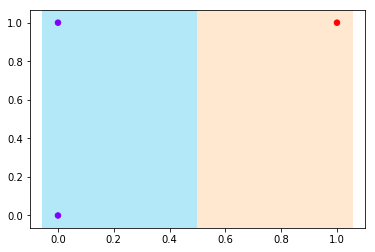

In [44]:
%matplotlib inline
visualize_classifier(classifier,X,y,pa=0.1)


En este sencillo ejemplo y con el fin de mejorar la compresión del método, a continuación se muestra el árbol de decisión obtenido.

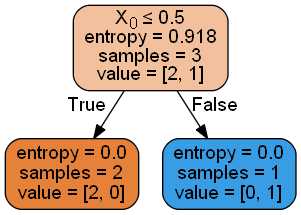

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

A continuación se muestra un ejemplo ya con datos más elaboradores y que se extraen del famoso conjunto de datos denominado Iris. 

In [46]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
X = iris.data
y = iris.target
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

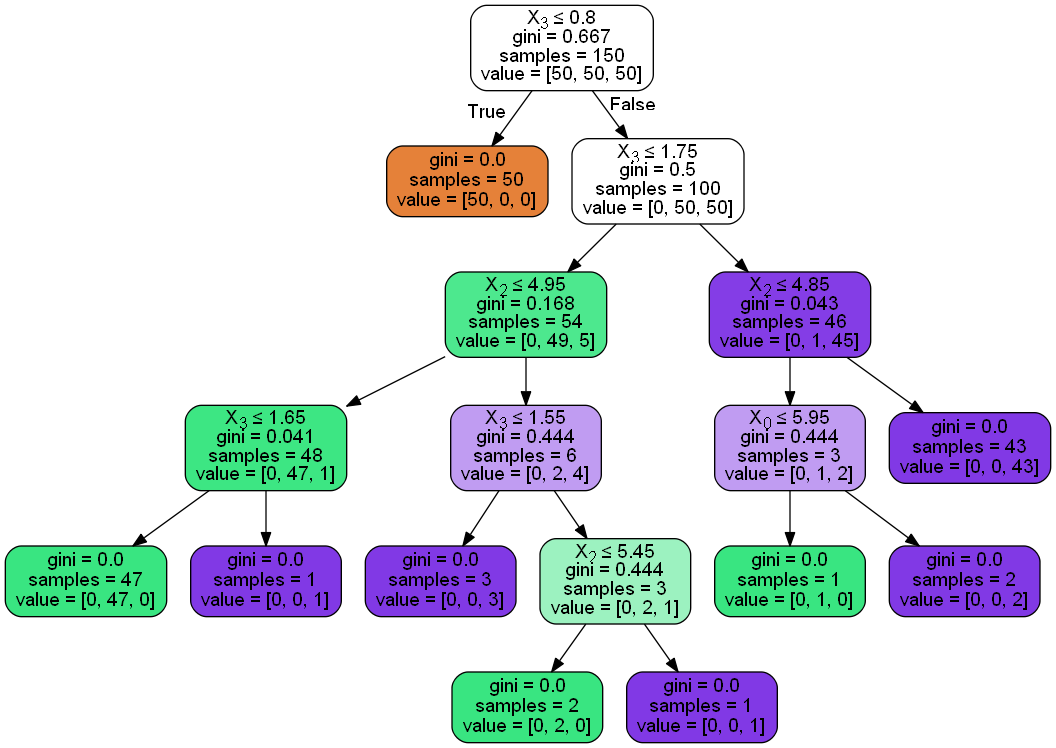

In [48]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

En los ejemplos que siguen, se van a utilizar diversos métodos que tiene este clasificador , con la finalidad de demostrar la gran cantidad de información que se puede obtener con este método.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Este método tiene un atributo denominado "tree" con muchas utilidades para conocer muchos datos de este modelo. A continuación, podemos ver la instrucción que nos permite ver la utilidades de este atributo.

In [50]:
import sklearn
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves,

* children_left[i]: contiene el ID de nodo del hijo izquierdo del nodo i

* children_right[i]: contiene el ID de nodo del hijo derecho del nodo i

* feature[i]: Es la feature utilizada para dividir el nodo

* threshold[i]: Contiene el valor usado para dividir el nodo i

In [51]:
#Obtenemos el número de nodos del modelo
n_nodes = estimator.tree_.node_count
print("Número de nodos del estimador:",n_nodes)
children_left = estimator.tree_.children_left
print("Valores de children_left \n",children_left)
children_right = estimator.tree_.children_right
print("Valores de children_right\n",children_right)
feature = estimator.tree_.feature
print("feature utilizada para para el split del nodo", feature)
threshold = estimator.tree_.threshold
print("Puntos de corte",threshold)

Número de nodos del estimador: 5
Valores de children_left 
 [ 1 -1  3 -1 -1]
Valores de children_right
 [ 2 -1  4 -1 -1]
feature utilizada para para el split del nodo [ 3 -2  2 -2 -2]
Puntos de corte [ 0.80000001 -2.          4.94999981 -2.         -2.        ]


In [52]:
# La estructura anterior puede ser utilizada para obtener varias propiedades 
# la profuncidad de cada nodo o si el mismo es una hoja.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("El árbol creado tiene %s nodes y con la siguiente estructura:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snodo =%s nodo hoja." % (node_depth[i] * "\t", i))
    else:
        print("%snodo =%s nodo de test: ir al nodo %s if X[:, %s] <= %s y si no al"
              " nodo %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

El árbol creado tiene 5 nodes y con la siguiente estructura:
nodo =0 nodo de test: ir al nodo 1 if X[:, 3] <= 0.800000011920929 y si no al nodo 2.
	nodo =1 nodo hoja.
	nodo =2 nodo de test: ir al nodo 3 if X[:, 2] <= 4.949999809265137 y si no al nodo 4.
		nodo =3 nodo hoja.
		nodo =4 nodo hoja.



In [53]:
print("Dimensión de X_test: ", X_test.shape)
# Con el método "decision_path" se obtiene el camino seguido paracada elemento de la muestra.
# Un valor distinto de cero en (i,j) indica que el elemento i de la muestra va vía el nodo j. 
#este método devuelve una matriz sparse, y aquí la pasamos a una matriz de tipo dense, con
#la finalidad de ver una estructura más familiar.

node_indicator = estimator.decision_path(X_test)
print( "Dimensión de node_indicator: ",node_indicator.shape)
print("caminos seguidos por los 5 primeros elementos de la muestra: \n",node_indicator.todense()[:5] )

# Con el método "apply" se devuelve el índice de la hoja
# que se predice para cada elemento de la muestra 

leave_id = estimator.apply(X_test)
print("Dimensión de leave_id: ",leave_id.shape)
print(leave_id)

#Ahora, es posible obtener las pruebas que se usaron para predecir una muestra o 
#un grupo de muestras. Primero, hagámoslo para la muestra

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Reglas utilizadas para predecir la muestra %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nLas siguientes muestras %s comparte el nodo %s en el árbol"
      % (sample_ids, common_node_id))
print("es el %s %% de todos los nodos." % (100 * len(common_node_id) / n_nodes,))

Dimensión de X_test:  (38, 4)
Dimensión de node_indicator:  (38, 5)
caminos seguidos por los 5 primeros elementos de la muestra: 
 [[1 0 1 0 1]
 [1 0 1 1 0]
 [1 1 0 0 0]
 [1 0 1 0 1]
 [1 1 0 0 0]]
Dimensión de leave_id:  (38,)
[4 3 1 4 1 4 1 3 3 3 4 3 3 3 3 1 3 3 1 1 3 3 1 1 3 1 1 3 3 1 4 3 1 3 4 3 1
 4]
Reglas utilizadas para predecir la muestra 0: 
decision id node 0 : (X_test[0, 3] (= 2.4) > 0.800000011920929)
decision id node 2 : (X_test[0, 2] (= 5.1) > 4.949999809265137)

Las siguientes muestras [0, 1] comparte el nodo [0 2] en el árbol
es el 40.0 % de todos los nodos.


# Otro ejemplo.

A continuación se muestra otro ejemplo de clasificación para ir comprendiendo mejor esta clase de scikit-learn

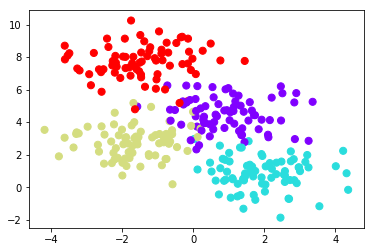

In [54]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [81]:
tree = DecisionTreeClassifier(max_depth=6).fit(X, y)

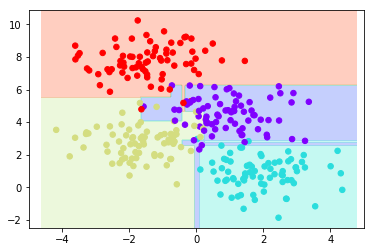

In [82]:
visualize_classifier(tree, X, y,pa=1)

Se pueden encontrar muchos ficheros python que se pueden utilizar como módulos [en este enlace](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks){:target="_blank"}.

En concreto se puede utilizar el módulo denominado [helpers_05_08.py](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/helpers_05_08.py){:target="_blank"} que nos sirve para delimitar mejor las zonas obtenidas anteriormente.


In [69]:
import sys
sys.path.append('G:\\modulos_py')

print(sys.path)

['', 'D:\\programas\\Anaconda\\python36.zip', 'D:\\programas\\Anaconda\\DLLs', 'D:\\programas\\Anaconda\\lib', 'D:\\programas\\Anaconda', 'D:\\programas\\Anaconda\\lib\\site-packages', 'D:\\programas\\Anaconda\\lib\\site-packages\\win32', 'D:\\programas\\Anaconda\\lib\\site-packages\\win32\\lib', 'D:\\programas\\Anaconda\\lib\\site-packages\\Pythonwin', 'D:\\programas\\Anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Francisco\\.ipython', 'G:\\modulos_py', 'G:\\modulos_py', 'G:\\modulos_py', 'G:\\modulos_py', 'G:\\modulos_py']


D:\programas\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


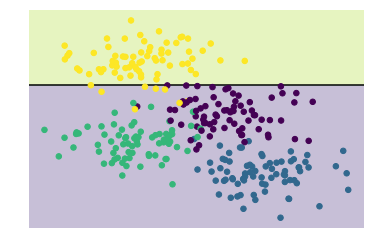

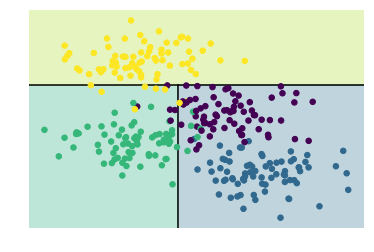

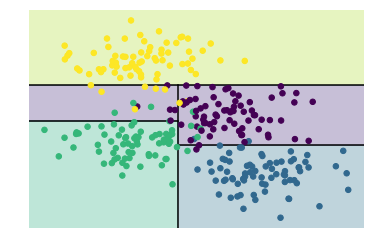

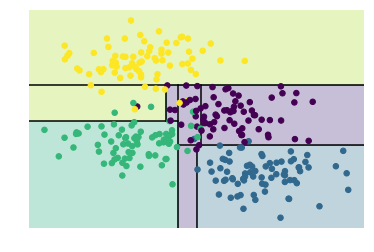

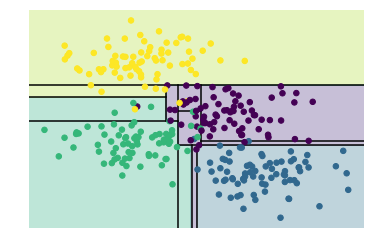

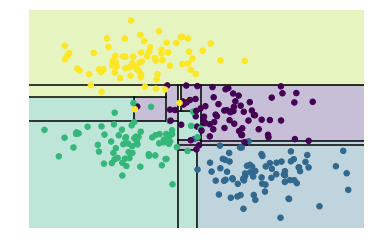

In [88]:
%matplotlib inline
for i in range(6):
    tree = DecisionTreeClassifier(max_depth=i+1).fit(X, y)

    helpers_05_08.visualize_tree(tree,X,y)
    plt.show()
    

# regresión

Cuando la variable dependiente o target, sea una variable continua, se puede utilizar la clase DecisionTreeRegressor() para hacer una regresión.

In [92]:
from sklearn import tree
X = [[0, 0], [2, 2],[1,3]]
y = [0.5, 2.5,3]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([2.5])

Veamos un ejemplo con mayores datos.

Dimensión de X (80, 1)
Dimensión de y:  (80,)


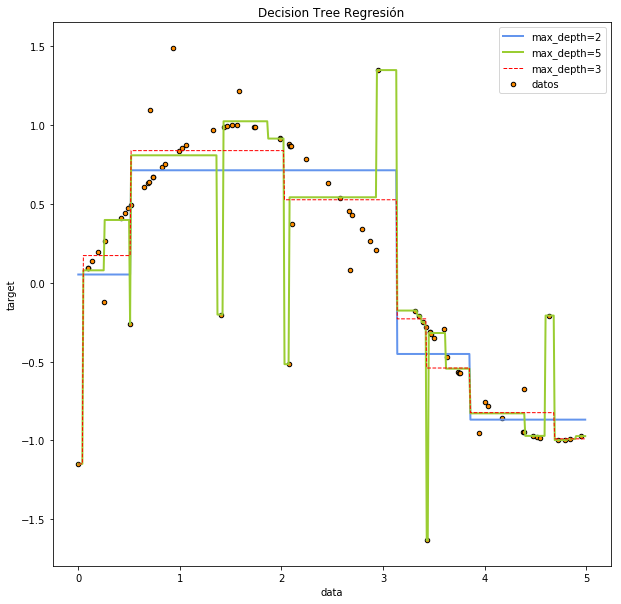

In [102]:
from sklearn.tree import DecisionTreeRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
print("Dimensión de X",X.shape)
y = np.sin(X).ravel()
print("Dimensión de y: ",y.shape)
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)


# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure( figsize=(10,10) )
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="datos")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3,'--' , color="red", label="max_depth=3", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regresión")
plt.legend()
plt.show()

# Métodos ensamble

Scikit Learn presenta una serie de métodos denominados [Ensamble methods](http://scikit-learn.org/stable/modules/ensemble.html){:Target="_blank"}, mediante los cuales se pueden mejorar la capacidad de predicción de un determinado modelo.

Uno de estos métodos es el denominado *random forest*, el cual no deja de ser más que una colección de modelos de tipo *decision tree* que han sido entrenados mediante la extracción de submuestras. En estos casos, la predicción que se obtiene puede ser la media o la moda de cada uno de los resultados obtenidos en las submuestras entrenadas. En el caso de scikit-learn el resultado es la media de los resultados. Las posibles clases utilizadas para estos casos son: *RandomForestClassifier*  y *RandomForestRegressor*.

Un ejemplo de la utilidad de estos procedimientos lo vemos a continuación. Podemos observar cómo se mejora la precisión de los  modelos mediante la utilización de estos procedimientos.


In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
     random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
     random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("La media de los scores en modo normal: ", scores.mean())                               
#0.98...

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
     min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("La media de los scores para random forest: ", scores.mean())                               
#0.999...

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
     min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print("La media de los scores para un extra random forest: ",scores.mean()) 
#True

La media de los scores en modo normal:  0.9823000000000001
La media de los scores para random forest:  0.9997
La media de los scores para un extra random forest:  1.0
